In [13]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pandas.io.json import json_normalize

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:80.0) Gecko/20100101 Firefox/80.0'}
url = 'https://www.nseindia.com/api/option-chain-equities?symbol=RELIANCE'
with requests.session() as s:

    # load cookies:
    s.get('https://www.nseindia.com/', headers=headers)

    # get data:
    data = s.get(url, headers=headers)

In [8]:
jd = data.json()

In [14]:
df = json_normalize(jd['records']['data'])

In [15]:
df.head()

,CE.askPrice,CE.askQty,CE.bidQty,CE.bidprice,CE.change,CE.changeinOpenInterest,CE.expiryDate,CE.identifier,CE.impliedVolatility,CE.lastPrice,...,PE.pChange,PE.pchangeinOpenInterest,PE.strikePrice,PE.totalBuyQuantity,PE.totalSellQuantity,PE.totalTradedVolume,PE.underlying,PE.underlyingValue,expiryDate,strikePrice
0,571.85,2525.0,11615.0,495.75,0.0,0.0,29-Oct-2020,OPTSTKRELIANCE29-10-2020CE1620.00,0.0,640.0,...,-5.263158,-1.41844,1620.0,28785.0,23735.0,9.0,RELIANCE,2178.0,29-Oct-2020,1620
1,652.50,11615.0,11615.0,505.40,0.0,0.0,26-Nov-2020,OPTSTKRELIANCE26-11-2020CE1620.00,0.0,0.0,...,0.000000,0.00000,1620.0,505.0,1010.0,0.0,RELIANCE,2178.0,26-Nov-2020,1620
2,632.10,11615.0,11615.0,487.90,0.0,0.0,26-Nov-2020,OPTSTKRELIANCE26-11-2020CE1640.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26-Nov-2020,1640
3,613.85,11615.0,11615.0,490.85,0.0,0.0,29-Oct-2020,OPTSTKRELIANCE29-10-2020CE1640.00,0.0,540.0,...,0.000000,0.00000,1640.0,4040.0,3030.0,0.0,RELIANCE,2178.0,29-Oct-2020,1640
4,591.90,11615.0,11615.0,473.35,0.0,0.0,29-Oct-2020,OPTSTKRELIANCE29-10-2020CE1660.00,0.0,0.0,...,0.000000,0.00000,1660.0,3030.0,3535.0,0.0,RELIANCE,2178.0,29-Oct-2020,1660


In [17]:
df.columns

Index(['CE.askPrice', 'CE.askQty', 'CE.bidQty', 'CE.bidprice', 'CE.change',
       'CE.changeinOpenInterest', 'CE.expiryDate', 'CE.identifier',
       'CE.impliedVolatility', 'CE.lastPrice', 'CE.openInterest', 'CE.pChange',
       'CE.pchangeinOpenInterest', 'CE.strikePrice', 'CE.totalBuyQuantity',
       'CE.totalSellQuantity', 'CE.totalTradedVolume', 'CE.underlying',
       'CE.underlyingValue', 'PE.askPrice', 'PE.askQty', 'PE.bidQty',
       'PE.bidprice', 'PE.change', 'PE.changeinOpenInterest', 'PE.expiryDate',
       'PE.identifier', 'PE.impliedVolatility', 'PE.lastPrice',
       'PE.openInterest', 'PE.pChange', 'PE.pchangeinOpenInterest',
       'PE.strikePrice', 'PE.totalBuyQuantity', 'PE.totalSellQuantity',
       'PE.totalTradedVolume', 'PE.underlying', 'PE.underlyingValue',
       'expiryDate', 'strikePrice'],
      dtype='object')

In [27]:
df['CE.openInterest'].dropna().index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            141, 142, 143, 144, 145, 146, 147, 148, 149, 150],
           dtype='int64', length=145)

In [19]:
import seaborn as sns

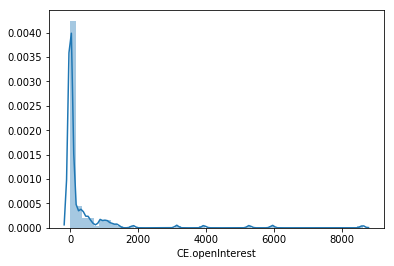

In [25]:
#snsdf=sns.load_dataset('df')
sns.distplot(df['CE.openInterest'].dropna())

In [33]:
yy = df['CE.openInterest'].dropna()

In [35]:
type(yy)

pandas.core.series.Series

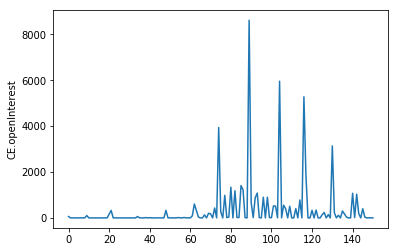

In [50]:
#sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
#fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x=df.index,y=df['CE.openInterest'],
             data=df)

In [46]:
df['CE.openInterest'][-1]

KeyError: -1